# Intro to CV Workshop 1: Getting Started with Computer Vision

**Note:** This notebook is meant to be used in conjunction with slides. Empty sections are fully explained in slides.

Please see the slides available in our GitHub repo here: https://github.com/acmucsd/acm-ai-workshops/tree/main/2023/SP23/intro-cv-series/workshop-1

Conventions used:

❗ - Important <br>
❓ - Question

## Section 1 - Overview of Computer Vision


### 1.1 Introduction of Computer Vision


Computer Vision is the process of making images or video readable and processable by a model with some output (e.g. finding an apple in an image, detecting threats in cars, etc).

Below, we will build some knowledge until we know enough to build a simple classification model.

 ### 1.2 The MNIST Dataset

First, we load our dataset. The MNIST dataset is a popular dataset of black-and-white, handwritten numbers.

We wish to classify these numbers from 0-9.

Import packages:

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

Download dataset:

In [ ]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Section 2 -  Formulating a Machine Learning problem 

### 2.1 What does a general (supervised) machine learning problem look like?
Machine learning can be applied to a host of different problems and situations, and models can be designed and trained to function as anything from a decision making machine to an intelligent chat bot. All of these revolve around taking in some input and outputting a desired answer.

The most fundamental or classical machine learning problems can usually be categorized as either classification problems, or regression problems.

❗ Definition: **Classification**
> Classification problems are when we are given data points, and we have to predict a label for them. For example, a classic problem is given an email, we want to predict whether it's spam or not.

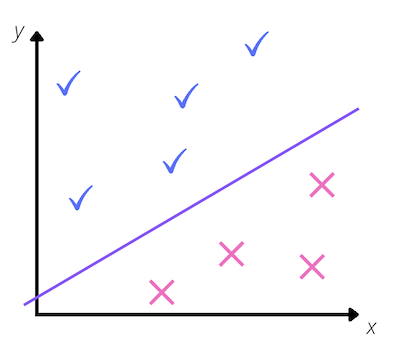

❗ Definition: **Regression**
> Regression problems usually involve predicting some continuous value, meaning a number. For example, given the face shot of a person, we want to predict their age.

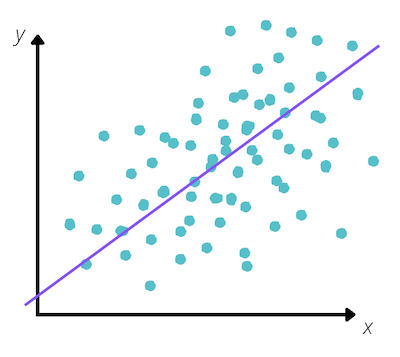

❓ Describe our MNIST problem - which type of Machine Learning problem is it?

--------------------------------

*Your answer here*


--------------------------------

### 2.2 Designing a loss function
So now that we've established the basics of our problem, how do we decide when an output is good and when an output is bad? We need ways to express whether an answer is good or bad in a mathematical way.

### 2.3 Gradient Descent - Adjusting an answer to be correct

### 2.4 Neural Networks

## Section 3 - Pytorch and Training Basics

### 3.1 Pytorch Basics

#### Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Example: We can represent an image as a tensor with shape $[3, 224, 224]$ which would mean $[color -channels, height, width]$

<img src="https://i.imgur.com/nvC8Y55.png" width=800>

In [ ]:
# Number 
t1 = torch.tensor(4.)

print(t1.ndim) # dimensions of a tensor
print (t1.shape) # shape of a tensor
print(t1.item()) # retrieve the number within a tensor (one-element tensor only)

0
torch.Size([])
4.0


In [ ]:
# Vector 
vector = torch.tensor([1,3,5]) 

# Matrix
matrix = [[5., 6], [7, 8], [9, 10]]
t3 = torch.tensor(matrix) 

In [ ]:
# Tensor
tensor = torch.rand(3, 2, 3)

# Find out details about it
print(tensor)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}") # will default to CPU

tensor([[[0.5843, 0.8439, 0.8188],
         [0.0286, 0.4818, 0.3263]],

        [[0.4090, 0.3526, 0.0094],
         [0.9182, 0.4434, 0.5573]],

        [[0.8779, 0.0466, 0.4150],
         [0.9927, 0.7585, 0.0632]]])
Shape of tensor: torch.Size([3, 2, 3])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


#### Tensors operations and functions

Basic operations in inclues:
* Addition
* Substraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

In [ ]:
t = torch.tensor([1, 2, 3, 5])

In [ ]:
print("Add 10:", t + 10)
print("Subtract tensor([ 1,  2,  3, 4]):", torch.sub(t, torch.tensor([1, 2, 3, 4])))
print("Element-wise multiplication: ", t * t) # = [1*1, 2*2, 3*3, 5*5]
print("Matrix multiplication:", torch.matmul(t, t)) # tensor @ tensor 

Add 10: tensor([11, 12, 13, 15])
Subtract tensor([ 1,  2,  3, 4]): tensor([0, 0, 0, 1])
Element-wise multiplication:  tensor([ 1,  4,  9, 25])
Matrix multiplication: tensor(39)


**Note**: In Pytorch, `@` and `torch.matmul` both denote matrix multiplication. However, you should use `torch.matmul` since it is faster

In [ ]:
%%time
t @ t

CPU times: user 72 µs, sys: 15 µs, total: 87 µs
Wall time: 92.5 µs


tensor(39)

In [ ]:
%%time
torch.matmul(t, t)

CPU times: user 55 µs, sys: 12 µs, total: 67 µs
Wall time: 69.9 µs


tensor(39)

#### Gradient

In [ ]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print("dy/dx:", x.grad)    # x.grad = 2 
print("dy/dw:", w.grad)    # w.grad = 1 
print("dy/db:", b.grad)    # b.grad = 1 

dy/dx: tensor(2.)
dy/dw: tensor(1.)
dy/db: tensor(1.)


#### Interoperability with Numpy

In [ ]:
# NumPy array to tensor
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

#### Running Tensors on GPU

In Google Colab, you can choose to run on GPU by select **Runtime** -> **Change runtime type** -> **Hardware Accelarator** -> **GPU**

In [ ]:
# Check for GPU
torch.cuda.is_available()

True

In [ ]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

By default, our code will run on CPU. However, you can move the tensors to your device of choice (GPU) to speed up numerical computation

In [ ]:
# Create tensor (default on CPU)
tensor = torch.tensor([4, 5, 6, 7])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([4, 5, 6, 7]) cpu


tensor([4, 5, 6, 7], device='cuda:0')

### 2.2 Training Models 

While building real-world machine learning models, it is quite common to split the dataset into three parts:

* **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
* **Validation set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
* **Test set** - used to compare different models or approaches and report the model's final accuracy.

**TODO: Add a table/illustration**
**Also should i talk about cross validation?**


First, we need to convert images into PyTorch tensors.

In [ ]:
# MNIST dataset (images and labels) 
dataset = MNIST(root='data/', 
                train=True,
                transform=ToTensor())

# Look at the first tensor in our dataset
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


We can use random_split to randomly split a dataset into non-overlapping new datasets of given lengths.
You can specify an amount of each smaller dataset or provide a list of fractions that sum up to 1. 

In [ ]:
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader

train, val, test = random_split(dataset, [0.6, 0.2, 0.2])
len(train), len(val), len(test)

(36000, 12000, 12000)

Additionally, you can load data into batches to train with Gradient Descent

In [ ]:
# Load data into batches
batch_size=128
train_loader = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val, batch_size*2, num_workers=2, pin_memory=True)

## Section 4 - Making a MLP piece-by-piece

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        self.linear1 = nn.Linear(in_size, hidden_size)  # hidden layer
        self.linear2 = nn.Linear(hidden_size, out_size) # output layer
        
  def forward(self, xb):
      xb = xb.view(xb.size(0), -1)   # Flatten the image tensors
      out = self.linear1(xb)        # Get intermediate outputs using hidden layer
      out = F.relu(out)             # Apply activation function
      out = self.linear2(out)       # Get predictions using output layer
      return out
  
  def train(self, batch):
      images, labels = batch 
      out = self(images)                  # Generate predictions
      loss = F.cross_entropy(out, labels) # Calculate loss 
      return loss
  
  def validation(self, batch):
      images, labels = batch 
      out = self(images)                    # Generate predictions
      loss = F.cross_entropy(out, labels)   # Calculate loss
      acc = accuracy(out, labels)           # Calculate accuracy
      return {'val_loss': loss, 'val_acc': acc}
      
  def validation_epoch_end(self, outputs):
      batch_losses = [x['val_loss'] for x in outputs]
      epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
      batch_accs = [x['val_acc'] for x in outputs]
      epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
      return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
  
  def epoch_result(self, epoch, result):
      print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    train_loss = []
    val_history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training  
        train_loss_epoch = []
        for batch in train_loader:
            # 1. Train model and calculate loss
            loss = model.train(batch)   
            train_loss_epoch.append(loss)

            # 2. Calculate Gradients
            loss.backward()  

            # 3. Update parameters using Gradients
            optimizer.step()

            # 5. Reset the gradients to zero
            optimizer.zero_grad()
            
        # Training result
        train_loss.append(torch.stack(train_loss_epoch).mean().item())

        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_result(epoch, result)
        val_history.append(result)
    return train_loss, val_history

In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
# Move train and validation tests to the chosen device 
train_loader = DeviceDataLoader(train_loader, get_default_device())
val_loader = DeviceDataLoader(val_loader, get_default_device())

In [ ]:
# Set up the model
model = NeuralNetwork(input_size, hidden_size, num_classes)

# Manage devices (GPUs)
to_device(model, device)

# See performance on validation set with initial weight before training
val_result = [evaluate(model, val_loader)]
print(val_result)

# Parameters
input_size = 784 
hidden_size = 32 
num_classes = 10
epochs = 10
lr = 0.1

# Train model
train_loss, val_history = fit(epochs, lr, model, train_loader, val_loader)
val_result += val_history

[{'val_loss': 2.3051323890686035, 'val_acc': 0.10092134773731232}]
Epoch [0], val_loss: 0.3967, val_acc: 0.8930
Epoch [1], val_loss: 0.3432, val_acc: 0.9035
Epoch [2], val_loss: 0.2995, val_acc: 0.9150
Epoch [3], val_loss: 0.2833, val_acc: 0.9204
Epoch [4], val_loss: 0.2621, val_acc: 0.9252
Epoch [5], val_loss: 0.2548, val_acc: 0.9257
Epoch [6], val_loss: 0.2314, val_acc: 0.9347
Epoch [7], val_loss: 0.2193, val_acc: 0.9384
Epoch [8], val_loss: 0.2106, val_acc: 0.9398
Epoch [9], val_loss: 0.2038, val_acc: 0.9416


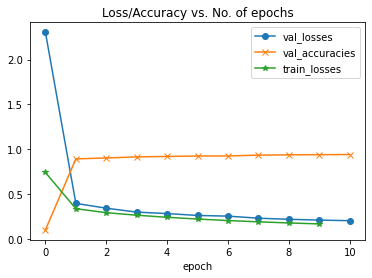

In [ ]:
# Visualization
val_losses = [x['val_loss'] for x in val_result]
val_accuracies = [x['val_acc'] for x in val_result]
train_losses = [x for x in train_loss]

plt.plot(val_losses, '-o', label='val_losses')
plt.plot(val_accuracies, '-x', label='val_accuracies')
plt.plot(train_losses, '-*', label='train_losses')

plt.legend()
plt.xlabel('epoch')
plt.title('Loss/Accuracy vs. No. of epochs');

### TODO
- Fix the graph
- Add more comments
- Add illustration for train/val/test
- Make code simpler + Make it a take home thing

In [ ]:
# Prediction